<a href="https://colab.research.google.com/github/tarunbalajiks/Speech-Emotion-Recognition/blob/main/TrainingCnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
''' Importing All Necessary Modules & Libraries '''

import os
import joblib
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.layers import Conv1D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import MaxPooling1D
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import pandas as pd


In [12]:
''' Training CNN '''

print('Training started')
X = joblib.load('/content/X.joblib')
y = joblib.load('/content/y.joblib')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

print(x_traincnn.shape, x_testcnn.shape)


# Defining the model structure
model = Sequential()
model.add(Conv1D(128, 5, padding='same', input_shape=(40, 1)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=(8)))  # Assuming pooling over 8 time steps
model.add(Conv1D(128, 5, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))

print(model.summary)

model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

cnn_history = model.fit(x_traincnn, y_train, batch_size=16, epochs=100, validation_data=(x_testcnn, y_test))


Training started
(3518, 40, 1) (1734, 40, 1)
<bound method Model.summary of <Sequential name=sequential_2, built=True>>


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.2568 - loss: 9.7257 - val_accuracy: 0.5000 - val_loss: 1.3564
Epoch 2/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5533 - loss: 1.2704 - val_accuracy: 0.6090 - val_loss: 1.1846
Epoch 3/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6029 - loss: 1.0975 - val_accuracy: 0.6373 - val_loss: 0.9855
Epoch 4/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6381 - loss: 0.9859 - val_accuracy: 0.6799 - val_loss: 0.8802
Epoch 5/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6558 - loss: 0.9447 - val_accuracy: 0.6822 - val_loss: 0.8394
Epoch 6/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6650 - loss: 0.9102 - val_accuracy: 0.6621 - val_loss: 0.8925
Epoch 7/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6834 - loss: 0.8879 - val_accuracy: 0.6724 - val_loss: 0.8477
Epoch 8/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6957 - loss: 0.8277 - val_a

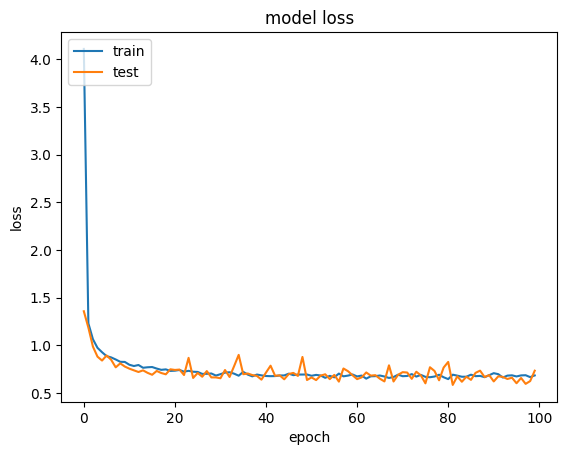

In [14]:
''' Loss plotting '''
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('loss.png')
plt.close()

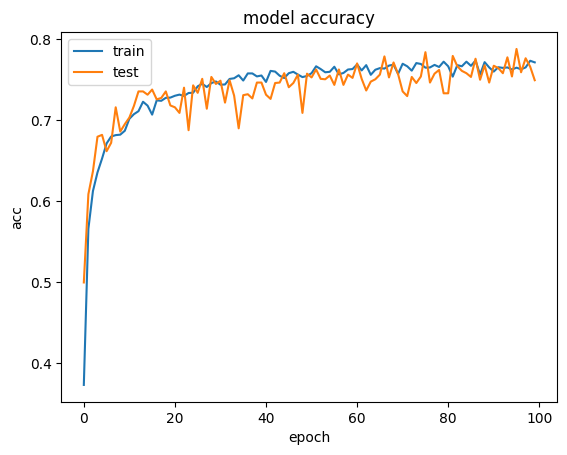

In [15]:
''' Accuracy plotting '''
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('accuracy.png')
plt.close()

In [41]:
''' Classification Report '''
predictions = np.argmax(model.predict(x_testcnn), axis=-1)
new_y_test = y_test.astype(int)
print(classification_report(new_y_test, predictions))

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.97      0.77      0.86       192
           1       0.46      0.87      0.60       123
           2       0.64      0.80      0.71       264
           3       0.76      0.75      0.76       275
           4       0.95      0.69      0.80       252
           5       0.89      0.74      0.81       241
           6       0.66      0.79      0.72       197
           7       0.95      0.64      0.76       190

    accuracy                           0.75      1734
   macro avg       0.78      0.76      0.75      1734
weighted avg       0.80      0.75      0.76      1734



In [40]:
''' Evaluate the model on the validation set '''
val_loss, val_accuracy = model.evaluate(x_testcnn, y_test)
print(f'Validation accuracy: {round(val_accuracy,2)*100}%')

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7388 - loss: 0.7459
Validation accuracy: 75.0%


In [27]:
''' Predictions '''
# Emotion Mapping
label_conversion = {'0': 'neutral',
                    '1': 'calm',
                    '2': 'happy',
                    '3': 'sad',
                    '4': 'angry',
                    '5': 'fearful',
                    '6': 'disgust',
                    '7': 'surprised'}

y_pred = model.predict(x_testcnn)
y_pred_classes = np.argmax(y_pred, axis=1)

actual_emotions = [label_conversion[str(label)] for label in y_test]
predicted_emotions = [label_conversion[str(label)] for label in y_pred_classes]

df = pd.DataFrame({'Actual': actual_emotions, 'Predicted': predicted_emotions})
df

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


,Actual,Predicted
0,sad,sad
1,sad,sad
2,sad,sad
3,angry,angry
4,neutral,neutral
...,...,...
1729,happy,happy
1730,sad,calm
1731,calm,calm
1732,disgust,disgust


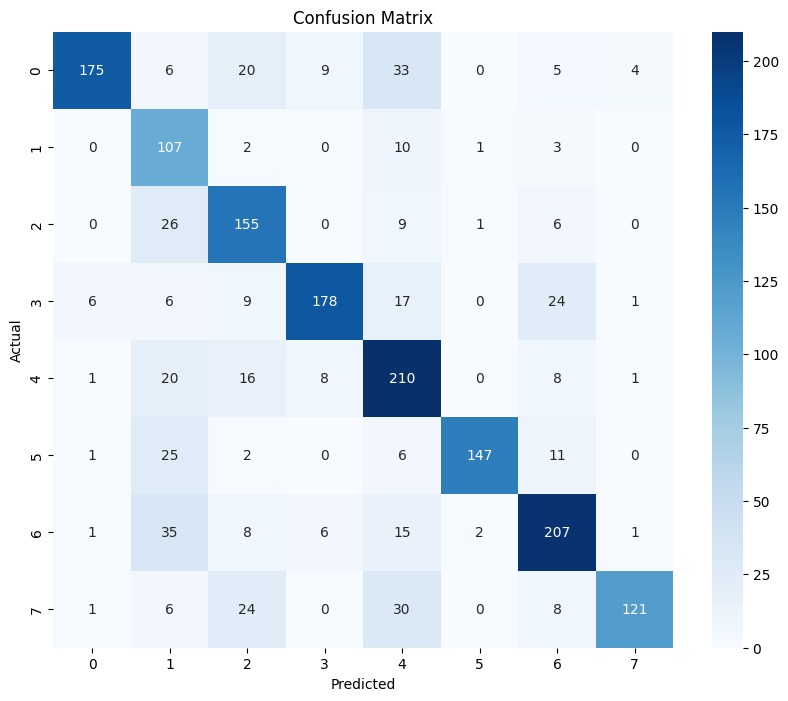

In [29]:
''' Confusion Matrix Visualization '''
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(actual_emotions, predicted_emotions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_conversion.keys(), yticklabels=label_conversion.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [30]:
''' Saving Model for Future Use '''
model_name = 'Emotion_Voice_Detection_Model.h5'
model_path = '/content/drive/MyDrive/vocal_dataset/models'
# Save model
model.save(model_name, model_path)
print(f'Saved trained model at {model_path}')

Saved trained model at /content/drive/MyDrive/vocal_dataset/models


In [43]:
''' Verifying if its stored '''
!cd /content/drive/MyDrive/vocal_dataset/models
!ls

accuracy.png  drive  Emotion_Voice_Detection_Model.h5  loss.png  sample_data  X.joblib	y.joblib
